# Signals and System Filters Project Phase 2

**Python Implementation of 8 + 1 filters**

In this phase we will apply filters to noisy image
**Note:** we will use our methods at previous phase so if you have problem on that section, please consider resolve their issue first.

- Dr. Farzam
- Spring 1404

## List of Filters to implement
- Moving Average Filter
- FIR Low-Pass Filter
- FIR High-Pass Filter
- FIR Band-Pass Filter
- Differentiator Filter
- Gaussian Filter
- Median Filter
- Box Filter
- Savitzky-Golay Filter (optional)

**Instructions**:
1. Implement the bodies of the following 8 + 1 functions marked with `#TODO`.
2. Implementing each function correctly earns 0.25 score.(last one may include more score)
3. **Do not use AI tools** or copy code from external sources. Any violation will result in 0 score for the project.

## Useful Links

- **Moving Average Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter1d.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter1d.html)
- **FIR Low-Pass Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html)
- **FIR High-Pass Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html)
- **FIR Band-Pass Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html)
- **Differentiator Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html)
- **Gaussian Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html)
- **Median Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html)
- **Box Filter**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter.html)
- **Savitzky-Golay Filter (optional)**: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html)

Please note that these links are provided for guidance purposes only.
> You are expected to implement the filters independently without directly using the `scipy` library or any library apart from those included at the top of the code.


- **Import necessary Libraries**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

- load the noisy image of a cute Dog :)

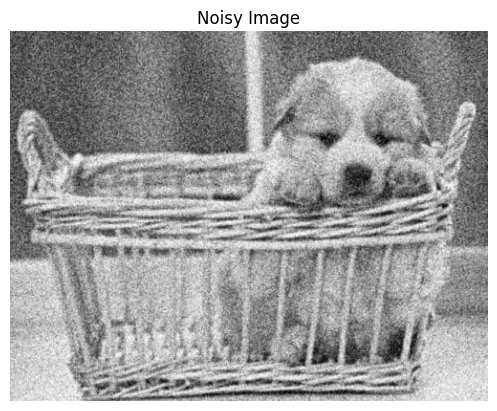

In [ ]:
# Load the noisy image
image_path = './image.jpg'
noisy_image = Image.open(image_path).convert('L')
noisy_image = np.array(noisy_image)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

#### 1. Moving Average Filter
- **Description**: Smooths the signal by averaging values within a sliding window.
- **Steps**:
  1. Iterate through the signal.
  2. For each point, compute the average of the values within the window centered on the point.
  3. Adjust the window boundaries for edge cases.

In [ ]:
def moving_average_filter(signal, window_size):
    filtered_signal = []
    for i in range(len(signal)):
        start = ... #TODO
        end = ... #TODO
        window = signal[start:end]
        filtered_signal.append(sum(window) / len(window))
    return filtered_signal


##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply moving average filter to it, and observe the results.

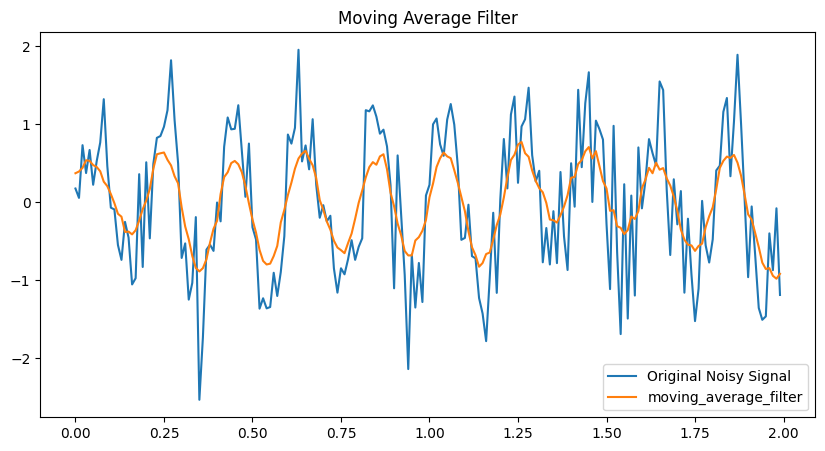

In [ ]:
# Generate a test signal
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = moving_average_filter(noisy_signal, window_size=10)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='moving_average_filter')
plt.title('Moving Average Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply moving average filter to it, and observe the results.

In [ ]:
def median_filter_2d(image, window_size):
    """
    Apply a median filter to a 2D image.
    image: 2D numpy array representing the image.
    window_size: The size of the filtering window (must be odd).
    """
    pad = ... #TODO
    padded_image = ... #TODO
    filtered_image = ... #TODO

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the window
            window = ... #TODO
            # Compute the median
            filtered_image[i, j] = ... #TODO

    return filtered_image

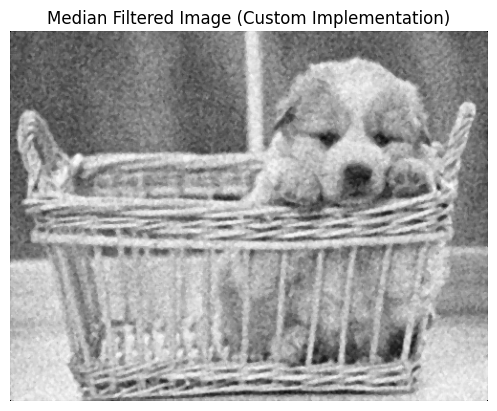

In [ ]:
# Example usage
window_size = 3  # Size of the filtering window
filtered_image = median_filter_2d(noisy_image, window_size)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.title('Median Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()

-----------------------------------------------------------------------------------------

#### 2. FIR Low-Pass Filter
- **Description**: Allows low-frequency signals to pass and attenuates high frequencies.
- **Steps**:
  1. Create the filter coefficients using the sinc function for ideal low-pass filter.
  2. Apply a window function (like Hamming) to reduce artifacts.
  3. Normalize the coefficients so their sum is 1.
  4. Convolve the signal with the filter coefficients.

In [ ]:
def fir_low_pass_filter(signal, cutoff_frequency, sample_rate, filter_length):
    nyquist = ... #TODO
    normalized_cutoff = ... #TODO
    filter_coeffs = ... #TODO
    filter_coeffs *= np.hamming(filter_length)
    filter_coeffs /= np.sum(filter_coeffs)
    filtered_signal = np.convolve(signal, filter_coeffs, mode='same')
    return filtered_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply low-pass filter to it, and observe the results.

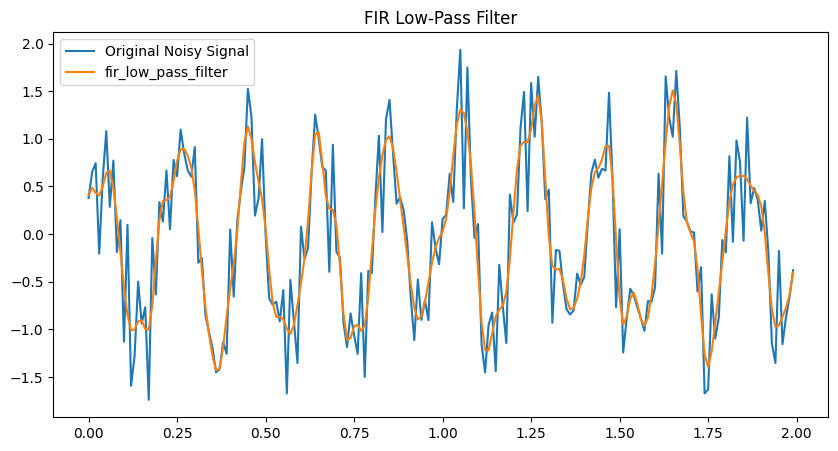

In [ ]:
# Generate a test signal
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = fir_low_pass_filter(noisy_signal, cutoff_frequency=10, sample_rate=100, filter_length=51)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='fir_low_pass_filter')
plt.title('FIR Low-Pass Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply low-pass filter to it, and observe the results.

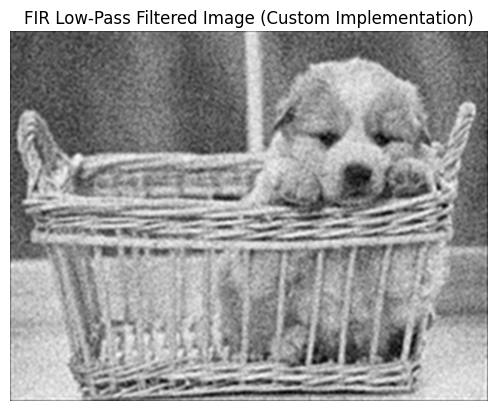

In [ ]:
def fir_low_pass_filter_2d(image, cutoff_frequency, sample_rate, filter_length):
    """
    Apply a 2D FIR Low-Pass Filter to an image.
    image: 2D numpy array representing the image.
    cutoff_frequency: Cutoff frequency of the low-pass filter.
    sample_rate: Sampling rate of the image.
    filter_length: Length of the filter kernel (must be odd).
    """
    nyquist = ... #TODO
    normalized_cutoff = ... #TODO

    # Create a 1D low-pass filter kernel
    kernel_1d = ... #TODO
    kernel_1d *= np.hamming(filter_length)  # Apply Hamming window
    kernel_1d /= np.sum(kernel_1d)  # Normalize the kernel

    # Create a 2D low-pass filter kernel by taking the outer product
    kernel_2d = np.outer(kernel_1d, kernel_1d)

    # Perform 2D convolution
    filtered_image = convolve_2d(image, kernel_2d)
    return filtered_image

filtered_image = fir_low_pass_filter_2d(noisy_image, cutoff_frequency = 0.1, sample_rate = 1.0, filter_length = 15)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.title('FIR Low-Pass Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()


-----------------------------------------------------------------------------------------

#### 3. FIR High-Pass Filter
- **Description**: Allows high-frequency signals to pass and attenuates low frequencies.
- **Steps**:
  1. Use the FIR low-pass filter implementation as a base.
  2. Subtract the low-pass filtered signal from the original signal to get the high-pass filtered signal.

In [ ]:
def fir_high_pass_filter(signal, cutoff_frequency, sample_rate, filter_length):
    low_pass_signal = ... #TODO
    high_pass_signal = ... #TODO
    return high_pass_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply high-pass filter to it, and observe the results.

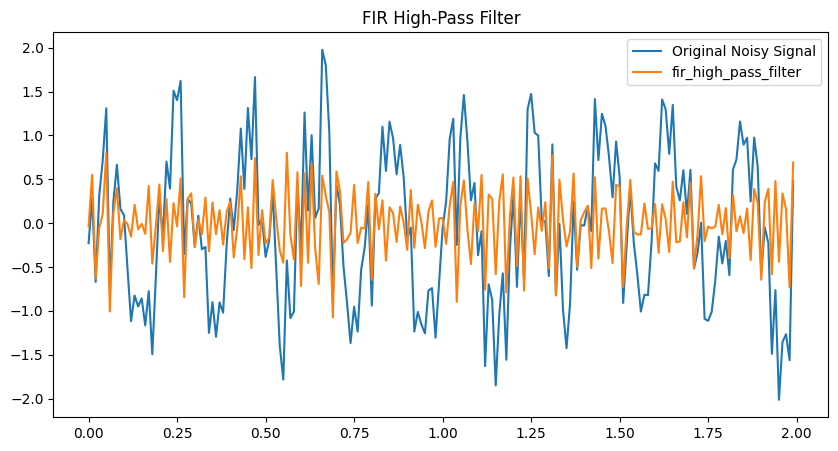

In [ ]:
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = fir_high_pass_filter(noisy_signal, cutoff_frequency=10, sample_rate=100, filter_length=51)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='fir_high_pass_filter')
plt.title('FIR High-Pass Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply high-pass filter to it, and observe the results.

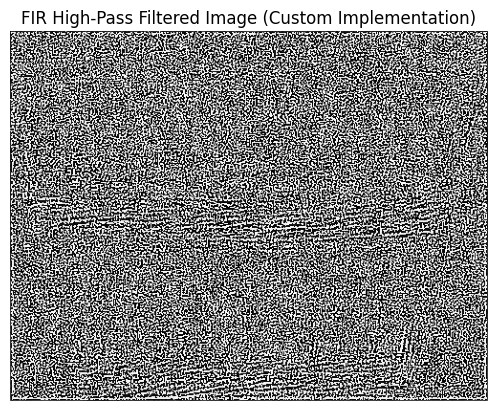

In [ ]:
def fir_high_pass_filter_2d(image, cutoff_frequency, sample_rate, filter_length):
    """
    Apply a 2D FIR High-Pass Filter to an image.
    image: 2D numpy array representing the image.
    cutoff_frequency: Cutoff frequency of the high-pass filter.
    sample_rate: Sampling rate of the image.
    filter_length: Length of the filter kernel (must be odd).
    """
    # Apply the FIR Low-Pass Filter to get the low-frequency components
    low_pass_image = ... #TODO

    # Subtract the low-pass filtered result from the original image to get the high-pass result
    high_pass_image = ... #TODO
    return high_pass_image

# Apply the FIR High-Pass Filter
high_pass_image = fir_high_pass_filter_2d(noisy_image, cutoff_frequency = 0.1, sample_rate = 1.0, filter_length = 15)

# Display the result
plt.imshow(high_pass_image, cmap='gray')
plt.title('FIR High-Pass Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()


-----------------------------------------------------------------------------------------

#### 4. FIR Band-Pass Filter
- **Description**: Passes frequencies within a specified range and attenuates frequencies outside it.
- **Steps**:
  1. Create a low-pass filter for the upper cutoff frequency.
  2. Create a high-pass filter for the lower cutoff frequency.
  3. Combine the two filters.

In [ ]:
def fir_band_pass_filter(signal, low_cutoff, high_cutoff, sample_rate, filter_length):
    ... #TODO
    return band_pass_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply band-pass filter to it, and observe the results.

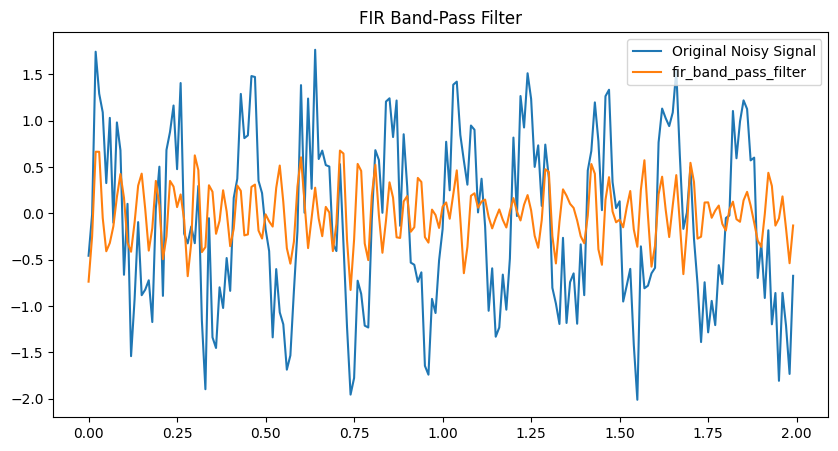

In [ ]:
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = fir_band_pass_filter(noisy_signal, low_cutoff=5, high_cutoff=15, sample_rate=100, filter_length=51)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='fir_band_pass_filter')
plt.title('FIR Band-Pass Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply band-pass filter to it, and observe the results.

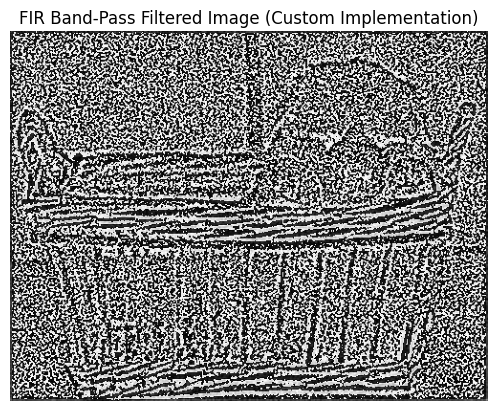

In [ ]:
def fir_band_pass_filter_2d(image, low_cutoff, high_cutoff, sample_rate, filter_length):
    """
    Apply a 2D FIR Band-Pass Filter to an image.
    image: 2D numpy array representing the image.
    low_cutoff: Lower cutoff frequency of the band-pass filter.
    high_cutoff: Upper cutoff frequency of the band-pass filter.
    sample_rate: Sampling rate of the image.
    filter_length: Length of the filter kernel (must be odd).
    """
    # Apply the FIR Low-Pass Filter with the higher cutoff frequency
    low_pass_image = ... #TODO

    # Apply the FIR High-Pass Filter with the lower cutoff frequency
    band_pass_image = ... #TODO

    return band_pass_image

# Apply the FIR Band-Pass Filter
band_pass_image = fir_band_pass_filter_2d(noisy_image, low_cutoff = 0.05, high_cutoff = 0.2, sample_rate = 1.0, filter_length = 15)

# Display the result
plt.imshow(band_pass_image, cmap='gray')
plt.title('FIR Band-Pass Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()


-----------------------------------------------------------------------------------------

#### 5. Differentiator Filter
- **Description**: Computes the difference between consecutive samples.
- **Steps**:
  1. Iterate through the signal.
  2. Compute the difference between adjacent samples.

In [ ]:
def differentiator_filter(signal):
    ... #TODO
    return diff_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply differentiator filter to it, and observe the results.

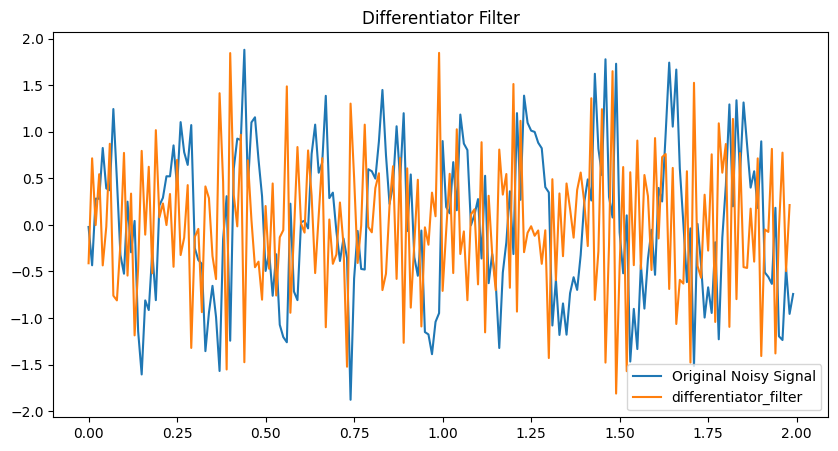

In [ ]:
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = differentiator_filter(noisy_signal, )

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='differentiator_filter')
plt.title('Differentiator Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply differentiator filter to it, and observe the results.

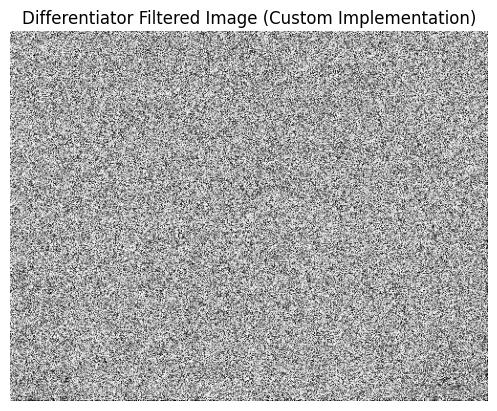

In [ ]:
def differentiator_filter_2d(image):
    """
    Apply a 2D Differentiator Filter to an image.
    image: 2D numpy array representing the image.
    """
    # Compute differences along the x and y axes
    diff_x = ... #TODO
    diff_y = ... #TODO

    # Combine the differences (e.g., magnitude of gradients)
    differentiated_image = ... #TODO

    return differentiated_image

# Example usage
differentiated_image = differentiator_filter_2d(noisy_image)

# Display the result
plt.imshow(differentiated_image, cmap='gray')
plt.title('Differentiator Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()

#### 6. Gaussian Filter
- **Description**: A smooth low-pass filter with a Gaussian-shaped frequency response.
- **Steps**:
  1. Generate a Gaussian kernel using the formula for a Gaussian function.
  2. Normalize the kernel so its sum is 1.
  3. Convolve the signal with the Gaussian kernel.

In [ ]:
def gaussian_filter(signal, sigma, window_size):
    kernel = ... #TODO
    kernel /= np.sum(kernel)
    filtered_signal = np.convolve(signal, kernel, mode='same')
    return filtered_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply gaussian filter to it, and observe the results.

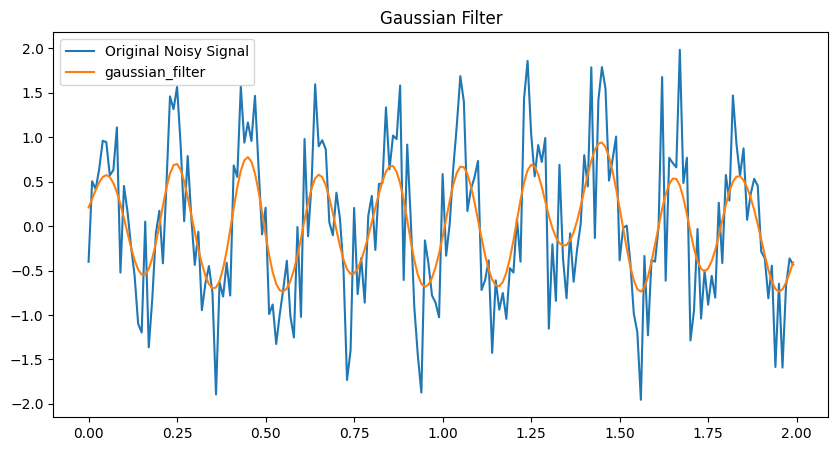

In [ ]:
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = gaussian_filter(noisy_signal, sigma=3, window_size=31)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='gaussian_filter')
plt.title('Gaussian Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply gaussian filter to it, and observe the results.

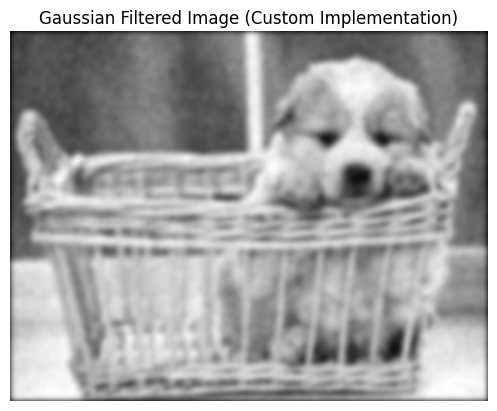

In [ ]:
def gaussian_kernel_2d(size, sigma):
    """
    Create a 2D Gaussian kernel.
    size: The width and height of the kernel (must be odd).
    sigma: The standard deviation of the Gaussian distribution.
    """
    k = ... #TODO
    x, y = ... #TODO
    kernel = ... #TODO
    kernel /= np.sum(kernel)  # Normalize the kernel
    return kernel

def convolve_2d(image, kernel):
    """
    Perform 2D convolution between an image and a kernel.
    """
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Convolve
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = ... #TODO
            output[i, j] = ... #TODO

    return output
def gaussian_filter_2d(image, size, sigma):
    """
    Apply a Gaussian filter to a 2D image.
    size: Size of the Gaussian kernel (must be odd).
    sigma: Standard deviation of the Gaussian kernel.
    """
    kernel = gaussian_kernel_2d(size, sigma)
    filtered_image = convolve_2d(image, kernel)
    return filtered_image

# Apply Gaussian Filter
filtered_image = gaussian_filter_2d(noisy_image, size = 31, sigma = 3)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()

-----------------------------------------------------------------------------------------

#### 7. Median Filter
- **Description**: Replaces each value with the median of a sliding window.
- **Steps**:
  1. Iterate through the signal.
  2. For each point, extract the values in the sliding window.
  3. Compute the median of these values.

In [ ]:
def median_filter(signal, window_size):
    filtered_signal = []
    for i in range(len(signal)):
        start = ... #TODO
        end = ... #TODO
        window = signal[start:end]
        filtered_signal.append(np.median(window))
    return filtered_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply median filter to it, and observe the results.

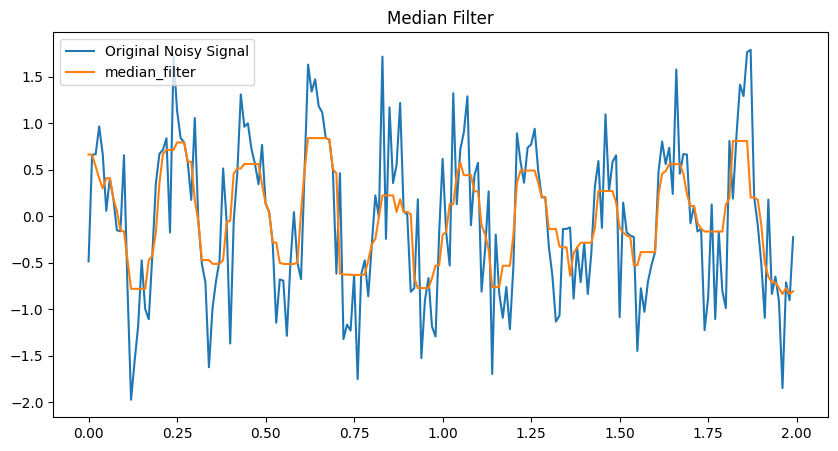

In [ ]:
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = median_filter(noisy_signal, window_size=10)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='median_filter')
plt.title('Median Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply median filter to it, and observe the results.

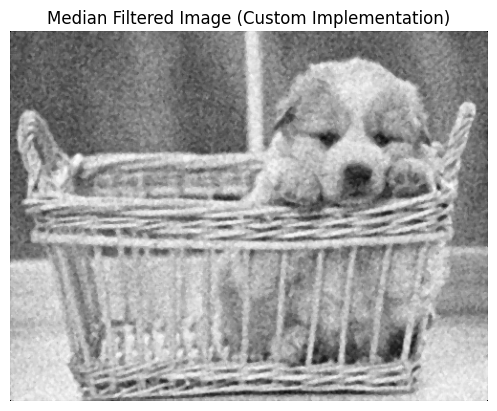

In [ ]:
def median_filter_2d(image, window_size):
    """
    Apply a 2D Median Filter to an image.
    image: 2D numpy array representing the image.
    window_size: Size of the sliding window (must be odd).
    """
    pad = window_size // 2
    padded_image = ... #TODO
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the sliding window
            window = ... #TODO
            # Compute the median
            filtered_image[i, j] = ... #TODO

    return filtered_image

filtered_image = median_filter_2d(noisy_image, window_size = 3)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.title('Median Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()


-----------------------------------------------------------------------------------------

#### 8. Box Filter
- **Description**: Similar to a moving average filter but calculates the average over a strict rectangular window.
- **Steps**:
  1. Take the average of a fixed window of points
  2. ensure the window moves across the signal.

In [ ]:
def box_filter(signal, window_size):
    """
    Applies a box filter to the signal.

    Parameters:
        signal (list or np.ndarray): Input signal to be filtered.
        window_size (int): Size of the rectangular window.

    Returns:
        list: Filtered signal.
    """
    filtered_signal = []
    half_window = window_size // 2

    for i in range(len(signal)):
        # Define the window bounds
        start = ... #TODO
        end = ... #TODO

        # Compute the average in the window
        window = signal[start:end]
        filtered_signal.append(sum(window) / len(window))

    return filtered_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply box filter to it, and observe the results.

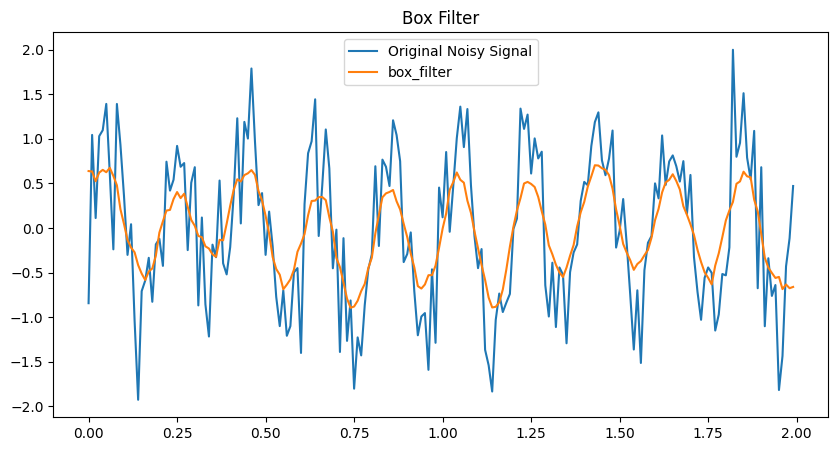

In [ ]:
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = box_filter(noisy_signal, window_size=10)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='box_filter')
plt.title('Box Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply box filter to it, and observe the results.

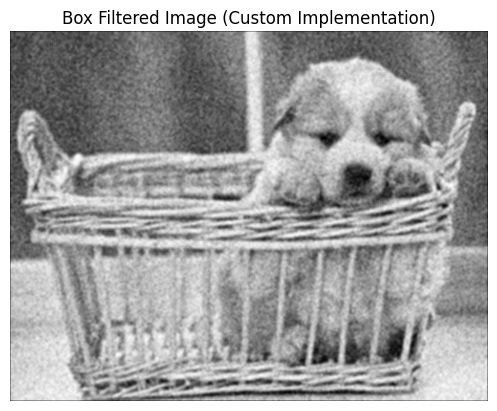

In [ ]:
def box_filter_2d(image, window_size):
    """
    Apply a 2D Box Filter to an image.

    Parameters:
        image (np.ndarray): Input 2D image.
        window_size (int): Size of the rectangular window (must be odd).

    Returns:
        np.ndarray: Filtered image.
    """
    pad = window_size // 2
    padded_image = ... #TODO
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the sliding window
            window = ... #TODO
            # Compute the average value in the window
            filtered_image[i, j] = ... #TODO

    return filtered_image

filtered_image = box_filter_2d(noisy_image, window_size = 3)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.title('Box Filtered Image (Custom Implementation)')
plt.axis('off')
plt.show()

-----------------------------------------------------------------------------------------

#### 9. Savitzky-Golay Filter
- **Description**: Fits successive subsets of a signal to a polynomial and uses the smoothed polynomial values.
- **Steps**:
  1. Fit a polynomial to the data within a sliding window.
  2. Use the polynomial to estimate the value at the center of the window.

In [ ]:
def savitzky_golay_filter(signal, window_size, poly_order):
    """
    Applies the Savitzky-Golay filter to the signal.

    Parameters:
        signal (list or np.ndarray): Input signal to be filtered.
        window_size (int): Size of the sliding window (must be odd).
        poly_order (int): Order of the polynomial to fit.

    Returns:
        list: Filtered signal.
    """
    if window_size % 2 == 0 or window_size < poly_order + 1:
        raise ValueError("Window size must be odd and greater than poly_order.")

    half_window = window_size // 2
    filtered_signal = []

    # Precompute the polynomial coefficients for the window
    indices = np.arange(-half_window, half_window + 1)
    poly_coeffs = np.linalg.pinv(np.vander(indices, poly_order + 1)).T[half_window]

    for i in range(len(signal)):
        # Extract the window
        start = ... #TODO
        end = ... #TODO
        window = signal[start:end]

        # Pad the window if it is smaller than the full size
        if len(window) < window_size:
            window = np.pad(window, (half_window - (i if i < half_window else 0),
                                     half_window - (len(signal) - 1 - i if i + half_window >= len(signal) else 0)),
                            mode='constant', constant_values=0)

        window = window[:len(poly_coeffs)]
        # Apply the polynomial coefficients to the window
        filtered_signal.append(np.dot(poly_coeffs, window))

    return filtered_signal

##### Apply to Noisy Signal
In this section, we generate a noisy signal, apply savitzky golay filter to it, and observe the results.

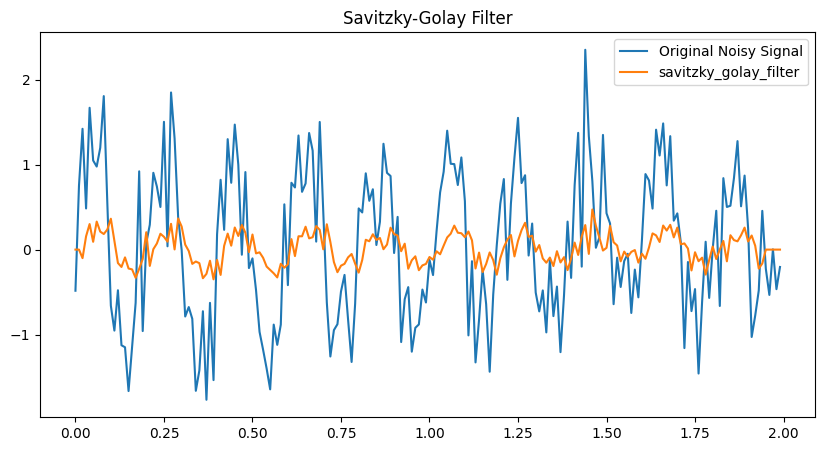

In [ ]:
def generate_test_signal(frequency=5, sample_rate=100, duration=2):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Sine wave
    noise = np.random.normal(0, 0.5, t.shape)  # Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

t, noisy_signal = generate_test_signal()
filtered_signal = savitzky_golay_filter(noisy_signal, window_size=11, poly_order=3)

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t[:len(filtered_signal)], filtered_signal, label='savitzky_golay_filter')
plt.title('Savitzky-Golay Filter')
plt.legend()
plt.show()


##### Apply to Noisy Image
In this section, we load our noisy image, apply savitzky golay filter to it, and observe the results.

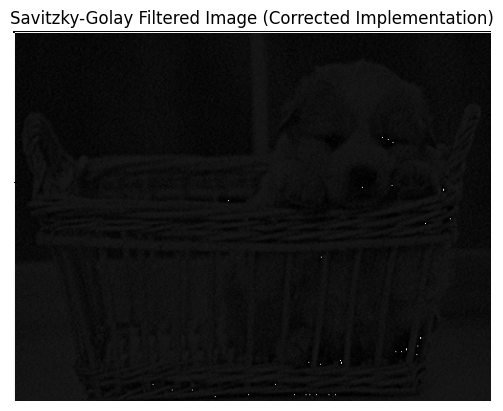

In [ ]:
def savitzky_golay_filter_2d(image, window_size, poly_order):
    """
    Apply a 2D Savitzky-Golay Filter to an image.

    Parameters:
        image (np.ndarray): Input 2D image.
        window_size (int): Size of the sliding window (must be odd).
        poly_order (int): Order of the polynomial to fit.

    Returns:
        np.ndarray: Filtered image.
    """
    if window_size % 2 == 0 or window_size < poly_order + 1:
        raise ValueError("Window size must be odd and greater than poly_order.")

    pad = window_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    # Precompute polynomial coefficients for the window
    indices = np.arange(-pad, pad + 1)
    x, y = np.meshgrid(indices, indices)
    A = np.vstack([x.flatten()**i * y.flatten()**j for i in range(poly_order + 1) for j in range(poly_order + 1 - i)]).T
    ATA_inv_AT = np.linalg.pinv(A).T

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the sliding window
            window = ... #TODO
            # Truncate the window to match the length of the coefficients
            window = ... #TODO
            # Apply the polynomial coefficients
            filtered_pixel = ... #TODO
            filtered_image[i, j] = ... #TODO

    return filtered_image

filtered_image = savitzky_golay_filter_2d(noisy_image, window_size = 5, poly_order = 2)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.title('Savitzky-Golay Filtered Image (Corrected Implementation)')
plt.axis('off')
plt.show()

-----------------------------------------------------------------------------------------